In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Os dados

### Conjunto de dados (diagnóstico) de câncer de mama em Wisconsin
---------------------------------------------

**Características do conjunto de dados:**

    :Número de Instâncias: 569

    :Número de Atributos: 30 atributos numéricos, preditivos e a classe

    :Informações do atributo:
        - raio (média das distâncias do centro aos pontos do perímetro)
        - textura (desvio padrão dos valores da escala de cinza)
        - perímetro
        - área
        - suavidade (variação local nos comprimentos dos raios)
        - compacidade (perímetro^2 / área - 1,0)
        - concavidade (gravidade das porções côncavas do contorno)
        - pontos côncavos (número de porções côncavas do contorno)
        - simetria
        - dimensão fractal ("aproximação da costa" - 1)

        A média, erro padrão e "pior" ou maior (média dos três
        maiores valores) desses recursos foram computados para cada imagem,
        resultando em 30 recursos. Por exemplo, o campo 3 é o raio médio, o campo
        13 é o Raio SE, o campo 23 é o Pior Raio.

        - aula:
                - WDBC-Maligno
                - WDBC-benigno

    :Resumo Estatísticas:
    ===================================== ====== ======
                                           Mínimo máximo
    ===================================== ====== ======
    raio (média): 6,981 28,11
    textura (média): 9,71 39,28
    perímetro (média): 43,79 188,5
    área (média): 143,5 2501,0
    suavidade (média): 0,053 0,163
    compacidade (média): 0,019 0,345
    concavidade (média): 0,0 0,427
    pontos côncavos (média): 0,0 0,201
    simetria (média): 0,106 0,304
    dimensão fractal (média): 0,05 0,097
    raio (erro padrão): 0,112 2,873
    textura (erro padrão): 0,36 4,885
    perímetro (erro padrão): 0,757 21,98
    área (erro padrão): 6.802 542.2
    suavidade (erro padrão): 0,002 0,031
    compacidade (erro padrão): 0,002 0,135
    concavidade (erro padrão): 0,0 0,396
    pontos côncavos (erro padrão): 0,0 0,053
    simetria (erro padrão): 0,008 0,079
    dimensão fractal (erro padrão): 0,001 0,03
    raio (pior): 7,93 36,04
    textura (pior): 12,02 49,54
    perímetro (pior): 50,41 251,2
    área (pior): 185,2 4254,0
    suavidade (pior): 0,071 0,223
    compacidade (pior): 0,027 1,058
    concavidade (pior): 0,0 1,252
    pontos côncavos (pior): 0,0 0,291
    simetria (pior): 0,156 0,664
    dimensão fractal (pior): 0,055 0,208

In [2]:
df = pd.read_csv('../Data/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

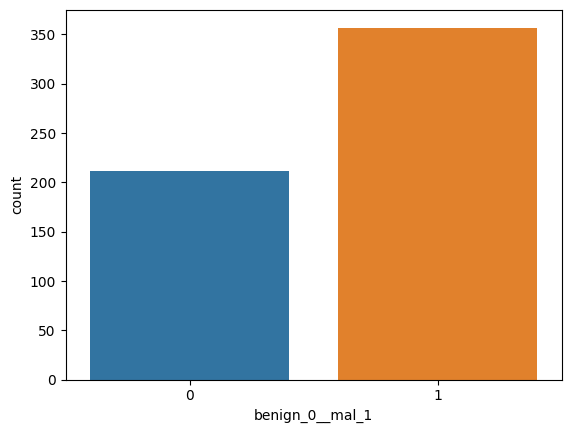

In [5]:
sns.countplot(x='benign_0__mal_1', data=df)

<Axes: >

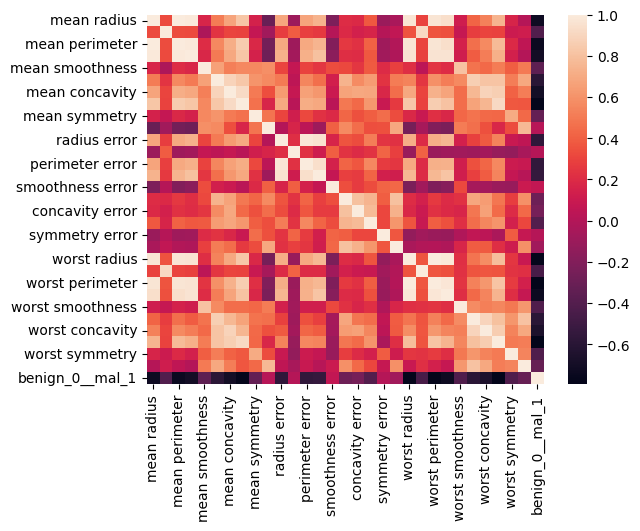

In [6]:
sns.heatmap(df.corr())

In [7]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

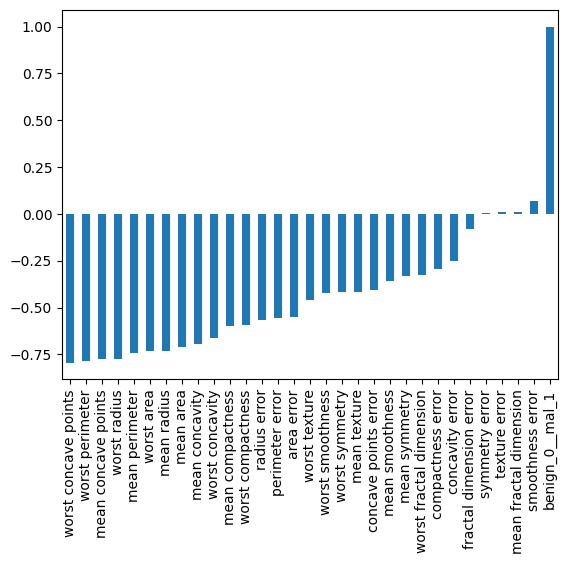

In [8]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

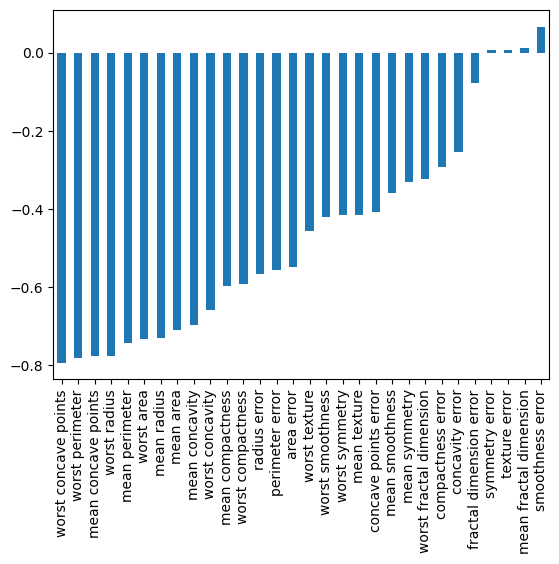

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [10]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=101
)

## Scaling Data

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

2023-05-01 16:53:47.734091: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-01 16:53:47.903600: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-01 16:53:47.906673: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 16:53:50.333255: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [18]:
X_train.shape

(398, 30)

In [19]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# For binary classification problems
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [20]:
model.fit(
    x=X_train, y=y_train,
    epochs=600,
    validation_data=(X_test, y_test), verbose=1
)

Epoch 1/600
13/13 [==============================] - 2s 41ms/step - loss: 0.6734 - val_loss: 0.6560
Epoch 2/600
13/13 [==============================] - 0s 13ms/step - loss: 0.6381 - val_loss: 0.6246
Epoch 3/600
13/13 [==============================] - 0s 13ms/step - loss: 0.6041 - val_loss: 0.5894
Epoch 4/600
13/13 [==============================] - 0s 13ms/step - loss: 0.5643 - val_loss: 0.5499
Epoch 5/600
13/13 [==============================] - 0s 13ms/step - loss: 0.5188 - val_loss: 0.5043
Epoch 6/600
13/13 [==============================] - 0s 12ms/step - loss: 0.4693 - val_loss: 0.4565
Epoch 7/600
13/13 [==============================] - 0s 13ms/step - loss: 0.4209 - val_loss: 0.4107
Epoch 8/600
13/13 [==============================] - 0s 14ms/step - loss: 0.3746 - val_loss: 0.3647
Epoch 9/600
13/13 [==============================] - 0s 12ms/step - loss: 0.3272 - val_loss: 0.3232
Epoch 10/600
13/13 [==============================] - 0s 14ms/step - loss: 0.2887 - val_loss: 0.2883

13/13 [==============================] - 0s 12ms/step - loss: 0.0277 - val_loss: 0.1482
Epoch 163/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0274 - val_loss: 0.1480
Epoch 164/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0289 - val_loss: 0.1493
Epoch 165/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0277 - val_loss: 0.1481
Epoch 166/600
13/13 [==============================] - 0s 15ms/step - loss: 0.0276 - val_loss: 0.1481
Epoch 167/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0280 - val_loss: 0.1492
Epoch 168/600
13/13 [==============================] - 0s 27ms/step - loss: 0.0268 - val_loss: 0.1506
Epoch 169/600
13/13 [==============================] - 0s 19ms/step - loss: 0.0266 - val_loss: 0.1490
Epoch 170/600
13/13 [==============================] - 0s 17ms/step - loss: 0.0271 - val_loss: 0.1498
Epoch 171/600
13/13 [==============================] - 0s 18ms/step - loss: 0.0268 - val_loss: 0

13/13 [==============================] - 0s 14ms/step - loss: 0.0134 - val_loss: 0.2482
Epoch 323/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0125 - val_loss: 0.2473
Epoch 324/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0135 - val_loss: 0.2521
Epoch 325/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0126 - val_loss: 0.2533
Epoch 326/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0129 - val_loss: 0.2545
Epoch 327/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0125 - val_loss: 0.2537
Epoch 328/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0123 - val_loss: 0.2550
Epoch 329/600
13/13 [==============================] - 0s 13ms/step - loss: 0.0125 - val_loss: 0.2565
Epoch 330/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0128 - val_loss: 0.2601
Epoch 331/600
13/13 [==============================] - 0s 14ms/step - loss: 0.0118 - val_loss: 0

13/13 [==============================] - 0s 12ms/step - loss: 0.0049 - val_loss: 0.4595
Epoch 483/600
13/13 [==============================] - 0s 12ms/step - loss: 0.0051 - val_loss: 0.4582
Epoch 484/600
13/13 [==============================] - 0s 12ms/step - loss: 0.0064 - val_loss: 0.4672
Epoch 485/600
13/13 [==============================] - 0s 12ms/step - loss: 0.0090 - val_loss: 0.4779
Epoch 486/600
13/13 [==============================] - 0s 11ms/step - loss: 0.0046 - val_loss: 0.4600
Epoch 487/600
13/13 [==============================] - 0s 11ms/step - loss: 0.0074 - val_loss: 0.4637
Epoch 488/600
13/13 [==============================] - 0s 12ms/step - loss: 0.0086 - val_loss: 0.4666
Epoch 489/600
13/13 [==============================] - 0s 12ms/step - loss: 0.0073 - val_loss: 0.4733
Epoch 490/600
13/13 [==============================] - 0s 12ms/step - loss: 0.0046 - val_loss: 0.4723
Epoch 491/600
13/13 [==============================] - 0s 12ms/step - loss: 0.0048 - val_loss: 0

In [21]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

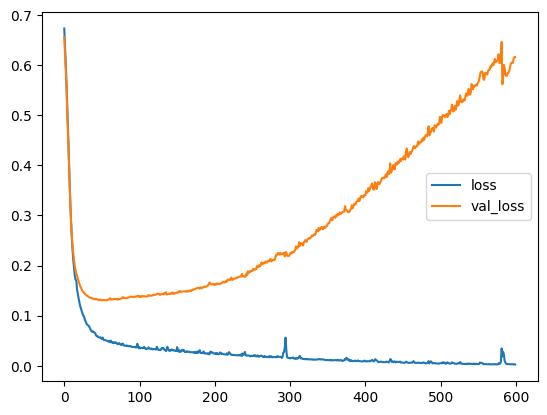

In [22]:
model_loss.plot() # → Overfitting

## Example Two: Early Stopping

Obviamente treinamos demais! Vamos usar a parada antecipada para rastrear o val_loss e parar de treinar assim que começar a aumentar demais!

In [23]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

Pare de treinar quando uma quantidade monitorada parar de melhorar.

    Argumentos:
        monitor: Quantidade a ser monitorada.
        min_delta: Mudança mínima na quantidade monitorada
            para se qualificar como uma melhoria, ou seja, uma absoluta
            alteração menor que min_delta, contará como não
            melhoria.
        patience: Número de épocas sem melhora
            após o qual o treinamento será interrompido.
        verbose: modo de verbosidade.
        mode: Um dos `{"auto", "min", "max"}`. No modo `min`,
            o treinamento irá parar quando a quantidade
            monitorado parou de diminuir; em `max`
            modo ele irá parar quando a quantidade
            monitorado parou de aumentar; em `auto`
            modo, a direção é inferida automaticamente
            a partir do nome da quantidade monitorada.

In [25]:
early_stop = EarlyStopping(
    monitor = 'val_loss',
    mode = 'min',
    verbose = 1,
    patience= 25
)

In [26]:
model.fit(
    x=X_train, y=y_train,
    epochs=600,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/600
13/13 [==============================] - 2s 41ms/step - loss: 0.6828 - val_loss: 0.6720
Epoch 2/600
13/13 [==============================] - 0s 14ms/step - loss: 0.6617 - val_loss: 0.6528
Epoch 3/600
13/13 [==============================] - 0s 16ms/step - loss: 0.6382 - val_loss: 0.6259
Epoch 4/600
13/13 [==============================] - 0s 27ms/step - loss: 0.6040 - val_loss: 0.5897
Epoch 5/600
13/13 [==============================] - 0s 19ms/step - loss: 0.5658 - val_loss: 0.5532
Epoch 6/600
13/13 [==============================] - 0s 19ms/step - loss: 0.5272 - val_loss: 0.5148
Epoch 7/600
13/13 [==============================] - 0s 19ms/step - loss: 0.4858 - val_loss: 0.4727
Epoch 8/600
13/13 [==============================] - 0s 20ms/step - loss: 0.4423 - val_loss: 0.4289
Epoch 9/600
13/13 [==============================] - 0s 18ms/step - loss: 0.3999 - val_loss: 0.3892
Epoch 10/600
13/13 [==============================] - 0s 15ms/step - loss: 0.3606 - val_loss: 0.3556

<Axes: >

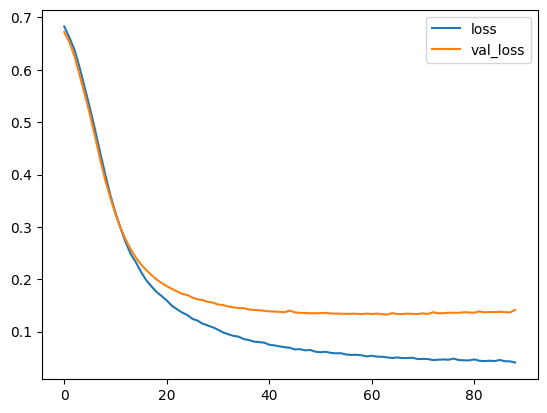

In [27]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [28]:
model1 = Sequential()

model1.add(Dense(30, activation='relu'))
model1.add(Dropout(.4))

model1.add(Dense(15, activation='relu'))
model1.add(Dropout(.4))

model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
model1.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
13/13 [==============================] - 3s 33ms/step - loss: 0.6913 - val_loss: 0.6874
Epoch 2/600
13/13 [==============================] - 0s 12ms/step - loss: 0.6777 - val_loss: 0.6748
Epoch 3/600
13/13 [==============================] - 0s 12ms/step - loss: 0.6657 - val_loss: 0.6617
Epoch 4/600
13/13 [==============================] - 0s 12ms/step - loss: 0.6591 - val_loss: 0.6422
Epoch 5/600
13/13 [==============================] - 0s 12ms/step - loss: 0.6353 - val_loss: 0.6144
Epoch 6/600
13/13 [==============================] - 0s 12ms/step - loss: 0.6160 - val_loss: 0.5843
Epoch 7/600
13/13 [==============================] - 0s 12ms/step - loss: 0.5922 - val_loss: 0.5559
Epoch 8/600
13/13 [==============================] - 0s 12ms/step - loss: 0.5571 - val_loss: 0.5240
Epoch 9/600
13/13 [==============================] - 0s 12ms/step - loss: 0.5515 - val_loss: 0.4941
Epoch 10/600
13/13 [==============================] - 0s 12ms/step - loss: 0.5067 - val_loss: 0.4615

<Axes: >

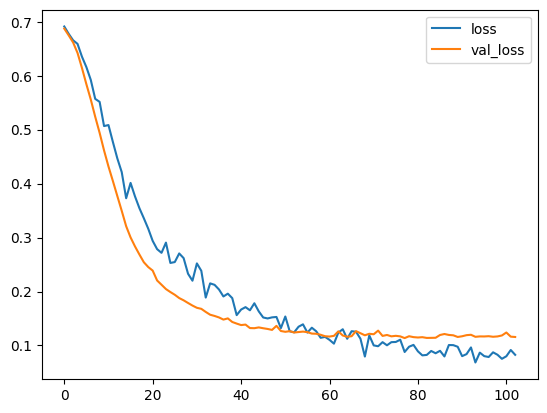

In [30]:
model1_loss = pd.DataFrame(model1.history.history)
model1_loss.plot()

## Model Evaluation

In [1]:
predictions = model.predict(X_test)
predictions1 = model1.predict(X_test)

predictions = (predictions > .5).astype('int32')
predictions1 = (predictions1 > .5).astype('int32')

NameError: name 'model' is not defined

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.97      0.97      0.97       105

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [34]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.97      0.99      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



In [35]:
print(confusion_matrix(y_test, predictions))
print(confusion_matrix(y_test, predictions1))

[[ 63   3]
 [  3 102]]
[[ 63   3]
 [  1 104]]
